In [70]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import scipy

In [7]:
resp = nsfg.ReadFemResp()
timesmar = resp['timesmar']
jintendn = resp['jintendn']

In [17]:
mt, st = timesmar.mean(), timesmar.std()
mt, st

(1.387057682985943, 4.297113023252983)

In [21]:
mj, sj = jintendn.mean(), jintendn.std()
mj, sj

(2.7052556818181817, 9.710108051456992)

In [33]:
mean , std = resp.jintendn.mean() , resp.jintendn.std()

pdf = thinkstats2.NormalPdf(mean,std)
pdf.Density(mean+std)

0.0249194677584289

In [35]:
npdft = thinkstats2.NormalPdf(mt, st)
npdfj = thinkstats2.NormalPdf(mj, sj)

pmft = npdft.MakePmf()
pmfj = npdfj.MakePmf()

npdfj.Density(mj + sj), npdft.Density(mt + st)

(0.0249194677584289, 0.05631006752900525)

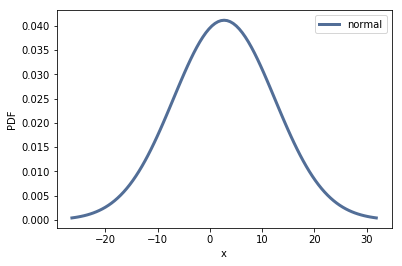

In [36]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

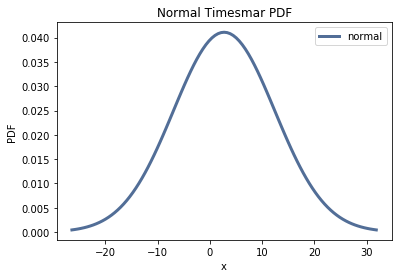

In [40]:

thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x',ylabel='PDF',title="Normal Timesmar PDF")

In [59]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [66]:
def SampleRows(resp, nrows, replace=False):
    indices = np.random.choice(resp.index, nrows, replace=replace)
    print(indices)
    sample = resp.loc[indices]
    return sample

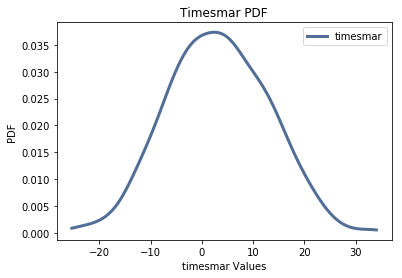

In [71]:
sample = np.random.normal(mean, std, 500)

pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(pdf, label='timesmar')
thinkplot.Config(xlabel='timesmar Values',ylabel='PDF',title="Timesmar PDF")

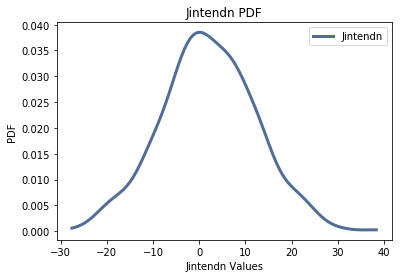

In [77]:
sample1 = np.random.normal(mean, std, 500)

pdf = thinkstats2.EstimatedPdf(sample1)
thinkplot.Pdf(pdf,label='Jintendn')
thinkplot.Config(xlabel='Jintendn Values', ylabel = 'PDF', title="Jintendn PDF")

In [84]:
cleaned = resp.dropna(subset=["timesmar", "jintendn"])

In [87]:
bins = np.arange(1, 100, 1)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
mean_times = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

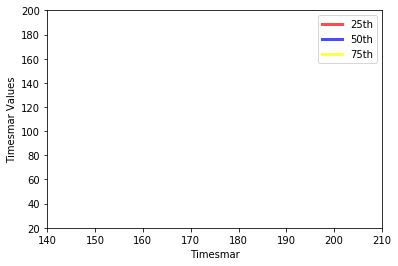

In [89]:
CustomColors = ["red","blue","yellow"]
percent = [25,50,75]
for i in range(len(percent)):
    label = '%dth' % percent[i]
    thinkplot.Plot(mean, std, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='Timesmar',
                 ylabel='Timesmar Values',
                 axis=[140, 210, 20, 200],
                 legend=True)